# Assignment 04

Joel Brigida

CAP4613-001 Intro to Deep Learning

Prof. Behnaz Ghoraani

Due Date: March 13, 2023

## Question 1:

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# function to plot images
def img_plt(img):
    plt.figure(figsize=(45, 40))
    plt.tight_layout()
    #plt.suptitle('Problem #1', fontsize=32)
    plt.tight_layout()
    for i in range(1, 7):
        plt.subplot(2, 3, i)
        plt.imshow(img[i - 1], cmap = 'gray')
        plt.title('Page: ' + str(i), fontsize=32)
    plt.show()

## Question 2:

### a) Create class NeuralNetwork() that creates a single neuron with a linear activation & train it using gradient descent learning. This class should have the following function:
 - 1. def __init__(self, learning_r): that initializes a 3x1 weight vector randomly and initializes the learning rate to learning_r. Also, it creates a history variable that saves the weights and the training cost after each epoch (i.e., iteration).
 - 2. def sigmoid(self, x): that takes an input x, and applies the sigmoid function to return:
$$ \varphi(x) = \frac{1}{1 + e^{-x}} $$
 - 3. def forward_propagation(self, inputs): that performs forward propagation by multiplying the inputs by the neuron weights, uses sigmoid activation function and then generates the output.
 - 4. def train(self, inputs_train, labels_train, num_train_iterations): that performs
the gradient descent learning rule for num_train_iterations times using the inputs and labels.

#### Define Plotting Functions:

In [2]:
# plot data points
def plot_fun(features, labels, classes):
    plt.plot(features[labels[:] == classes[0], 0], features[labels[:] == classes[0], 1], 'rs',
        features[labels[:] == classes[1], 0], features[labels[:] == classes[1], 1], 'g^')
    plt.axis([-2, 3, -2, 4])
    plt.title('Raw Data Plot For Both Classes')
    plt.xlabel('X_1: Feature 1')
    plt.ylabel('X_2: Feature 2')
    plt.legend(['Class ' + str(classes[0]), 'Class ' + str(classes[1])])
    plt.show()

# plot separating line: w1x1 + w2x2 + w0 = 0
def plot_fun_thr(features, labels, thresholdParams, learnRate, classes = [0, 1]):
    # plot data points
    plt.plot(features[labels[:] == classes[0], 0], features[labels[:] == classes[0], 1], 'rs',
        features[labels[:] == classes[1], 0], features[labels[:] == classes[1], 1], 'g^')
    plt.axis([-2, 3, -2, 4])
    # plot separating line
    x1 = np.linspace(-2, 3, 50)
    # w1x1 + w2x2 + w0 = 0 => x2 = -(w1x1 + w0) / w2
    x2 = -(thresholdParams[1] * x1 + thresholdParams[0]) / thresholdParams[2]
    plt.plot(x1, x2, '-b')
    plt.title(f'Data Classification: Learn Rate = {learnRate}')
    plt.xlabel('X_1: Feature 1')
    plt.ylabel('X_2: Feature 2')
    plt.legend(['Class ' + str(classes[0]), 'Class ' + str(classes[1])])
    #plt.pause(0.5)
    plt.show()

def plot_cost_func(J, iterations, learnRate):
    # Plot learning curve
    print('Learning Curve Plot:')
    x = np.arange(iterations, dtype = int)
    y = J
    plt.plot(x, y)
    plt.hlines(y = min(y), xmin = min(x) - 5, xmax = max(x) + 5, color='green', linestyle='--')
    plt.text((10), (min(y) - 0.02), f'J(0) = %.5f' %min(y), color='green', fontsize=12) # text for threshold line
    plt.axis([-1, x.shape[0] + 1, -0.1, np.max(y) + 0.1])
    plt.title(f'Learning Curve: Learn Rate = {learnRate}')
    plt.xlabel('X_1: Iteration Number')
    plt.ylabel('X_2: J(0)')
    plt.show()

#### Custom Accuracy Function: 

In [3]:
def calcAccuracy(predictionArray, labelArray):    
    #print(predictionArray)
    #print(labelArray)
    
    # Squeeze and reshape the predicted values back to 1 dimensional row:
    # This is so we can compare to the original labels
    newPredictions = np.squeeze(np.reshape(predictionArray, (1, len(predictionArray))), 0)
    #print(newPredictions)

    compareValues = newPredictions == labelArray
    #print(compareValues) # Print results of matching indices.

    nonMatching = np.count_nonzero(~compareValues)
    print(f'Number of Non-Matching Labels = {nonMatching}')
    print(f'Classification Accuracy Based on Training Data = {100 - (nonMatching / len(labelArray) * 100)} %')

#### Define Class Functions:

In [4]:
class NeuralNetwork():

    def __init__(self, learning_r):
        # using seed to make sure same weights are generated w/ each run
        np.random.seed(1)
        # 3x1 weight matrix
        # Random Weights between -1 and 1
        self.weight_matrix = np.random.random((3, 1)) - 1
        # initialize learning rate
        self.learning_r = learning_r

    # sigmoid as activation function
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # Calculate Local Field
    def forward_propagation(self, inputs):
        outs = np.dot(inputs, self.weight_matrix)
        return self.sigmoid(outs)

    def train(self, inputs_train, labels_train, num_train_iterations):
        N = inputs_train.shape[0]
        cost_func = np.array([])
        
        print('Classification Line Based on Initial Weights:')
        plot_fun_thr(inputs_train[:, 1:3], labels_train[:, 0], self.weight_matrix[:, 0], self.learning_r)
        # Perform number of iterations for this input set
        for iteration in range(num_train_iterations):
            outputs = self.forward_propagation(inputs_train)
            
            # Calculate error in output
            error = labels_train - outputs
            adjustment = (self.learning_r / N) * np.sum(np.multiply(error, inputs_train), axis = 0)

            # Calculate Cost Function
            cost_func = np.append(cost_func, (1 / (2 * N)) * np.sum(np.power(error, 2)))
            # Adjust the weight matrix
            self.weight_matrix[:, 0] += adjustment
            
            # Plot Separating line based on weights
            #print('Iteration # '+ str(iteration + 1))
            #plot_fun_thr(inputs_train[:, 1:3], labels_train[:, 0], self.weight_matrix[:, 0]) #, classes) # OPTIONAL
        print(f'Classification Line After {num_train_iterations} Iterations:')
        plot_fun_thr(inputs_train[:, 1:3], labels_train[:, 0], self.weight_matrix[:, 0], self.learning_r)
        plot_cost_func(cost_func, num_train_iterations, self.learning_r)

    # Predicting Classes of New Data Points
    def pred(self, inputs):
        prob = self.forward_propagation(inputs)
        preds = np.int8(prob >= 0.5)
        return preds

### b) Use the gradient descent rule to train a single neuron on the datapoints given below:

 - 1. Create an np array of a shape 10x2 that contains the inputs, and another array with a shape 10x1 that contains the labels.
 - 2. Plot the given data points with two different markers for each group.
 - 3. Add the bias to the inputs array to have a 10x3 shape.
 - 4. Create the network with one neuron using the class NeuralNetwork() with learning rate of 1 then train it using train(inputs, labels, 50) function.

<div align="center">

| Input<br>$x_1, \ x_2$ | Desired Label |
| :-: | :-: |
| $1,\ 1$ | $1$ |
| $1,\ 0$ | $1$ |
| $0,\ 1$ | $0$ |
| $0.5,\ -1$ | $0$ |
| $0.5,\ 3$ | $1$ |
| $0.7,\ 2$ | $1$ |
| $-1,\ 0$ | $0$ |
| $-1,\ 1$ | $0$ |
| $2,\ 0$ | $1$ |
| $0,\ 0$ | $0$ |

</div>

### c) Use the trained weights and plot the final classifier line.

### d) Plot the training cost (i.e., the learning curve) for all the epochs.

### e) Repeat step (b.4) with the learning rates of 0.5, 0.1, and 0.01. Plot the final classifier line and the learning curve for each learning rate.

### f) What behavior do you observe from the learning curves with the different learning rates? Explain your observations. Which learning rate is more suitable? Explain.

#### Declare Features and Labels Vectors:

Features Vector Raw Data:
[[ 1.   1. ]
 [ 1.   0. ]
 [ 0.   1. ]
 [ 0.5 -1. ]
 [ 0.5  3. ]
 [ 0.7  2. ]
 [-1.   0. ]
 [-1.   1. ]
 [ 2.   0. ]
 [ 0.   0. ]] 



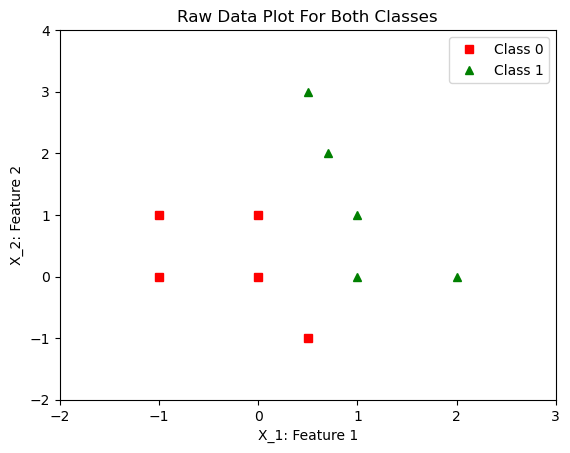

In [5]:
features = np.array([[1, 1], [1, 0], [0, 1], [0.5, -1], [0.5, 3], [0.7, 2], [-1, 0], [-1, 1], [2, 0], [0, 0]])
labels = np.array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0])
classes = [0, 1]
learn_rates = [1, 0.5, 0.1, 0.01] # Learn Rates as a list

print('Features Vector Raw Data:')
print(features, '\n')

plot_fun(features, labels, classes)

#### Declare Bias Vector and Append to Features Vector:

In [6]:
bias = np.ones((features.shape[0], 1))
features = np.append(bias, features, axis = 1)
print('Features Vector Including Bias:')
print(features, '\n')

print(f'Shape of Features: {features.shape}')

Features Vector Including Bias:
[[ 1.   1.   1. ]
 [ 1.   1.   0. ]
 [ 1.   0.   1. ]
 [ 1.   0.5 -1. ]
 [ 1.   0.5  3. ]
 [ 1.   0.7  2. ]
 [ 1.  -1.   0. ]
 [ 1.  -1.   1. ]
 [ 1.   2.   0. ]
 [ 1.   0.   0. ]] 

Shape of Features: (10, 3)


#### $$ \mathrm{Training \ Learn \ Rate = 1.0} $$

Random Weights At Start of Training:
[[-0.582978  ]
 [-0.27967551]
 [-0.99988563]] 

Labels as a Single Row:
[1 1 0 0 1 1 0 0 1 0] 

Classification Line Based on Initial Weights:


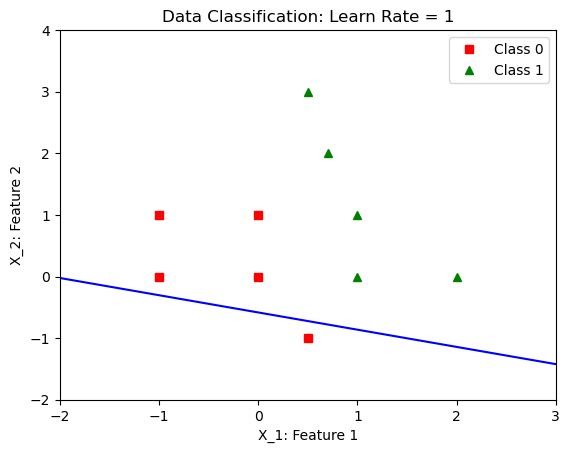

Classification Line After 50 Iterations:


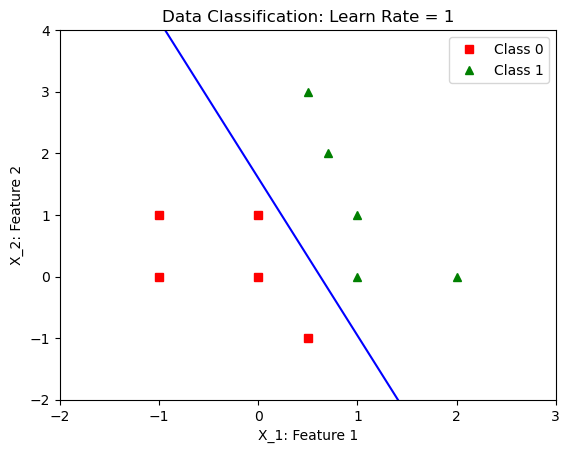

Learning Curve Plot:


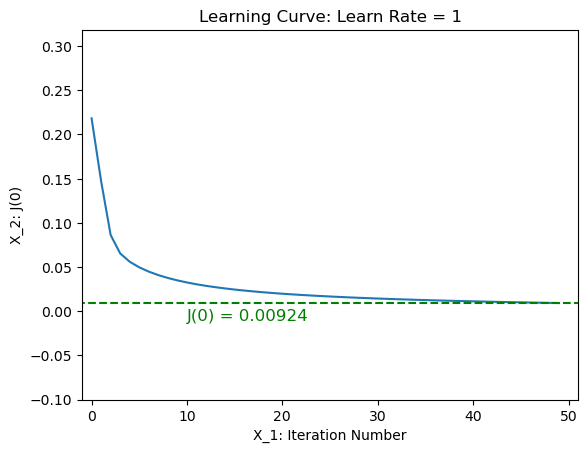

New Weights After Training:
[[-2.15589103]
 [ 3.44282177]
 [ 1.34648   ]] 

Number of Non-Matching Labels = 0
Classification Accuracy Based on Training Data = 100.0 %


In [7]:
Net1 = NeuralNetwork(learning_r = learn_rates[0])
print('Random Weights At Start of Training:')
print(Net1.weight_matrix, '\n')

print('Labels as a Single Row:')
print(labels, '\n')

#print('Labels as a Single Column:')
#print(np.expand_dims(labels, axis = 1), '\n')

Net1.train(features, np.expand_dims(labels, axis = 1), 50)

print('New Weights After Training:')
print(Net1.weight_matrix, '\n')

Net1PredictedValues = Net1.pred(features)
calcAccuracy(Net1PredictedValues, labels)

#### Test Neural Network on Training Points:

#### $$ \mathrm{Training \ Learn \ Rate = 0.5} $$

Random Weights At Start of Training:
[[-0.582978  ]
 [-0.27967551]
 [-0.99988563]] 

Labels as a Single Row:
[1 1 0 0 1 1 0 0 1 0] 

Classification Line Based on Initial Weights:


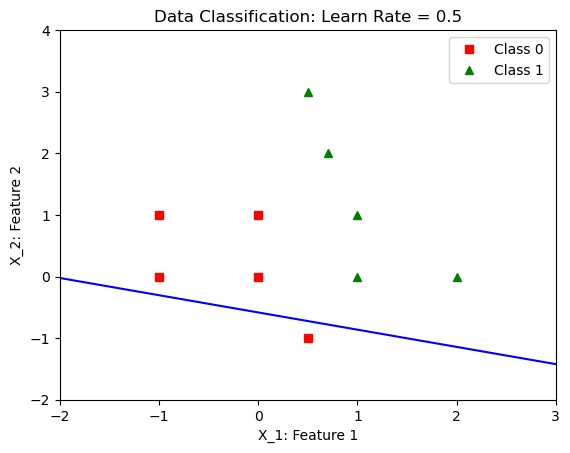

Classification Line After 50 Iterations:


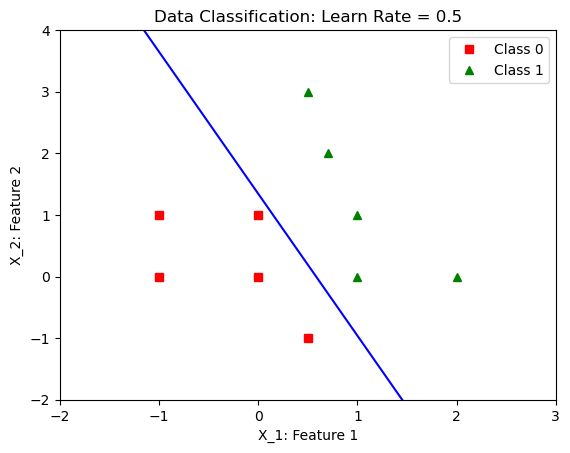

Learning Curve Plot:


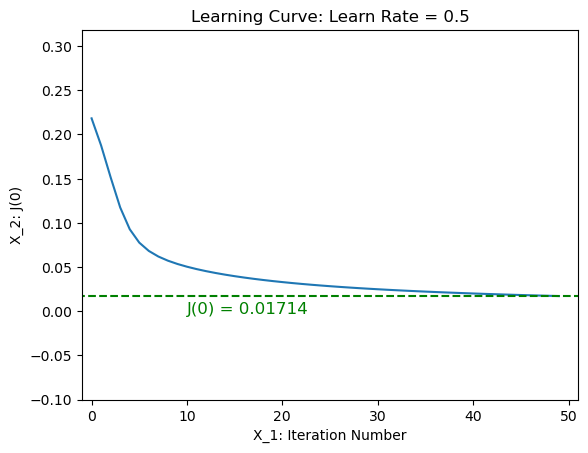

New Weights After Training:
[[-1.46647452]
 [ 2.5125989 ]
 [ 1.0902884 ]] 

Number of Non-Matching Labels = 0
Classification Accuracy Based on Training Data = 100.0 %


In [8]:
Net2 = NeuralNetwork(learning_r = learn_rates[1])
print('Random Weights At Start of Training:')
print(Net2.weight_matrix, '\n')

print('Labels as a Single Row:')
print(labels, '\n')

#print('Labels as a Single Column:')
#print(np.expand_dims(labels, axis = 1), '\n')

Net2.train(features, np.expand_dims(labels, axis = 1), 50)

print('New Weights After Training:')
print(Net2.weight_matrix, '\n')

Net2PredictedValues = Net2.pred(features)
calcAccuracy(Net2PredictedValues, labels)

#### $$ \mathrm{Training \ Learn \ Rate = 0.1} $$

Random Weights At Start of Training:
[[-0.582978  ]
 [-0.27967551]
 [-0.99988563]] 

Labels as a Single Row:
[1 1 0 0 1 1 0 0 1 0] 

Classification Line Based on Initial Weights:


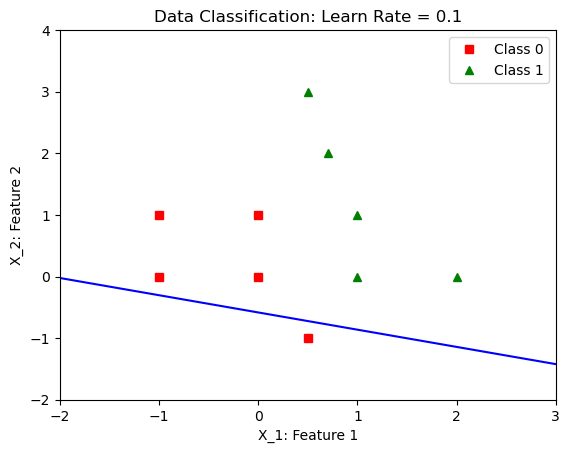

Classification Line After 50 Iterations:


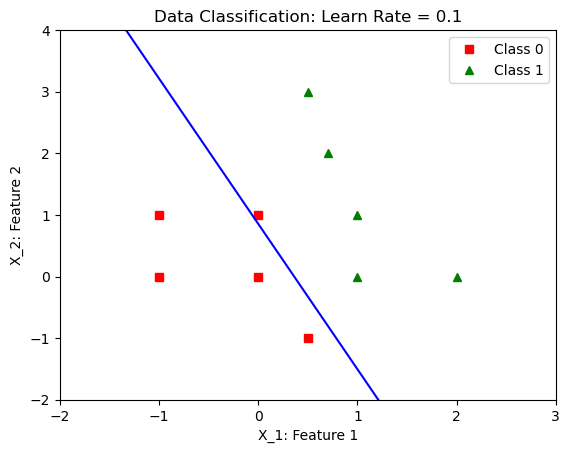

Learning Curve Plot:


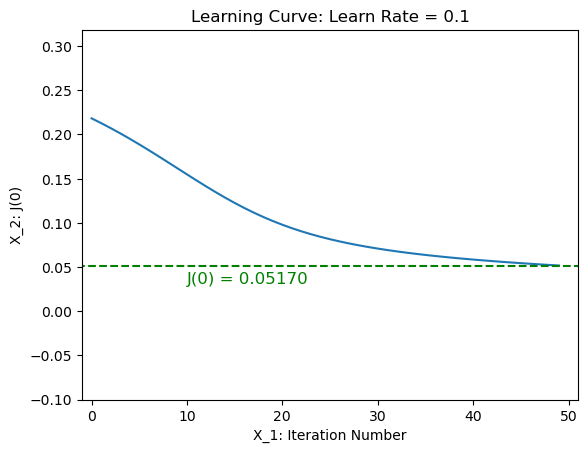

New Weights After Training:
[[-0.3734815 ]
 [ 1.02910109]
 [ 0.43611818]] 

Number of Non-Matching Labels = 1
Classification Accuracy Based on Training Data = 90.0 %


In [9]:
Net3 = NeuralNetwork(learning_r = learn_rates[2])
print('Random Weights At Start of Training:')
print(Net3.weight_matrix, '\n')

print('Labels as a Single Row:')
print(labels, '\n')

#print('Labels as a Single Column:')
#print(np.expand_dims(labels, axis = 1), '\n')

Net3.train(features, np.expand_dims(labels, axis = 1), 50)

print('New Weights After Training:')
print(Net3.weight_matrix, '\n')

Net3PredictedValues = Net3.pred(features)
calcAccuracy(Net3PredictedValues, labels)

#### $$ \mathrm{Training \ Learn \ Rate = 0.01} $$

Random Weights At Start of Training:
[[-0.582978  ]
 [-0.27967551]
 [-0.99988563]] 

Labels as a Single Row:
[1 1 0 0 1 1 0 0 1 0] 

Classification Line Based on Initial Weights:


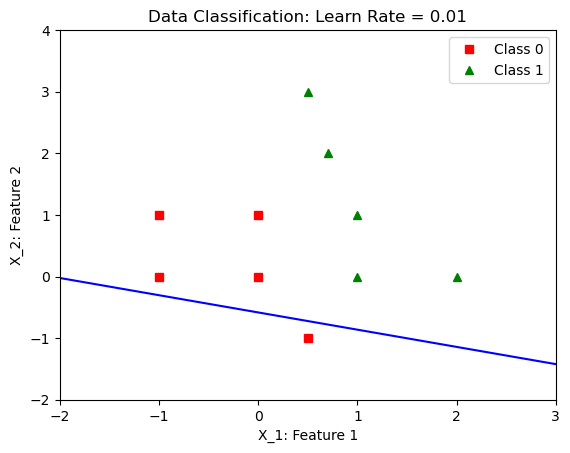

Classification Line After 50 Iterations:


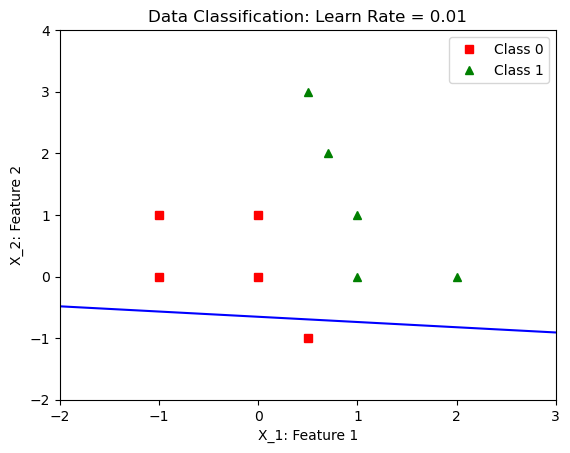

Learning Curve Plot:


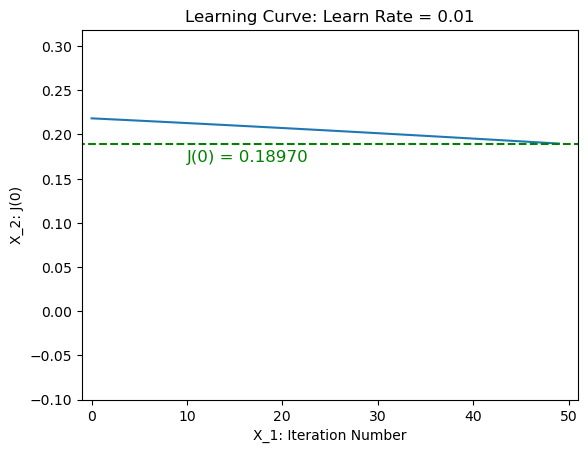

New Weights After Training:
[[-0.46855031]
 [-0.06091881]
 [-0.71706988]] 

Number of Non-Matching Labels = 6
Classification Accuracy Based on Training Data = 40.0 %


In [10]:
Net4 = NeuralNetwork(learning_r = learn_rates[3])
print('Random Weights At Start of Training:')
print(Net4.weight_matrix, '\n')

print('Labels as a Single Row:')
print(labels, '\n')

#print('Labels as a Single Column:')
#print(np.expand_dims(labels, axis = 1), '\n')

Net4.train(features, np.expand_dims(labels, axis = 1), 50)

print('New Weights After Training:')
print(Net4.weight_matrix, '\n')

Net4PredictedValues = Net4.pred(features)
calcAccuracy(Net4PredictedValues, labels)